<div style="border-radius: 15px; border: 3px solid navy; padding: 15px; ">
<b> Привет, Матвей! Меня зовут Денис Иванов. </b> 
<br> Сегодня я буду проверять твой проект. Попробую помочь тебе сделать его еще лучше!
<br> Если не против, то дальнейшее общение будет проходить на «ты». Если это неприемлемо, то обязательно напиши мне в комментариях — мы перейдем на «вы».
<br> Также сразу хочу обратить внимание на цветовую разметку.
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Так обозначены отличные решения и идеи, которые можно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Так обозначено то, что можно сделать лучше или оптимизировать.
</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
❌ Так  обозначено то, что требует исправления. Работа не может быть принята с красными комментариями.
</div>
    
<br> Пожалуйста, не перемещай, не изменяй и не удаляй мои коментарии, так как они повышают качество повторного ревью.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
    
<br> Также будет очень хорошо, если ты будешь помечать свои действия следующим образом.
    
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> ...
</div>
    
<hr style="border-width: 3px;">
    
<b>Полезные ссылки:</b>

* Если тебя заинтересовал процесс создания и применения нейронных сетей, то могу предложить обратить внимание на следующие курсы: 
    - <a href='https://stepik.org/course/401/info'>Нейронные сети</a> — математика и  алгоритмы, лежащие в основе обучения нейронных сетей,
    - <a href='https://dls.samcs.ru'>DLS</a> — теория и практика глубокого обучения и нейронных сетей на PyTorch.
* Если удобнее читать, то вот довольно познавательная книга <a href='https://vk.com/wall-203365865_1152'>«PyTorch. Освещая глубокое обучение»</a>.
    
<hr style="border-width: 3px;">
    
<b>Общее впечатление</b>
* Большое спасибо за проделанную работу.
* Радует, что проект хорошо структурирован.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Проект принят.
</div>

# Определение возраста покупателей

## Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Давать в начале работы описание проекта — хорошая практика.
</div>

## Исследовательский анализ данных

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
path = r"/datasets/faces/"

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Обрати внимание на импорты. Если какой-то модуль/библиотеку ты не используешь в дальнейшем, то из импорта ее стоит убрать.
</div>

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

labels.describe()

Found 7591 validated image filenames.


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ `ImageDataGenerator` инициализирован верно, однако обрати внимание на наименование переменных:
- `train_gen_flow` — данное название наводит на мысль о тренировочной выборке, что в дальнейшем может запутать как и тебя, так и читающего твой код коллегу. Не стоит забывать, что основной принцип хорошего именования — имена должны быть содержательными (полностью отражать своё назначение).
</div>

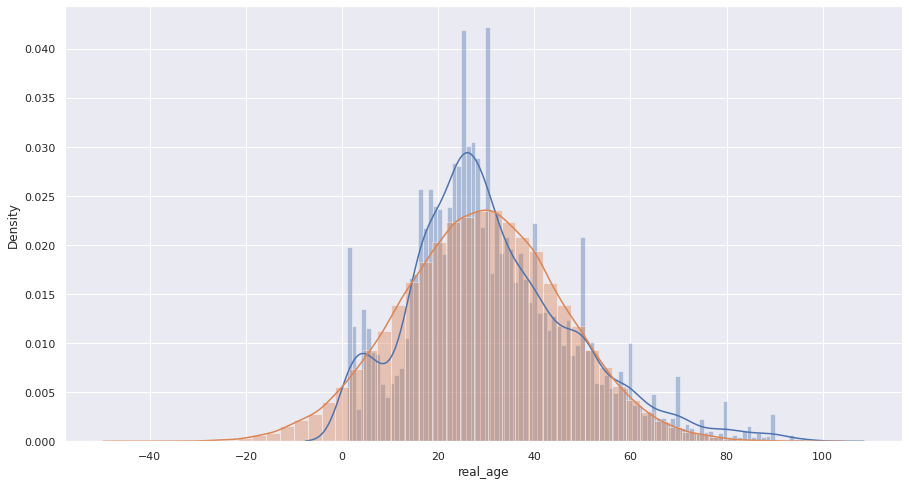

In [4]:
plt.figure(figsize=(15,8))
sns.distplot(labels['real_age'], bins=100)
sns.distplot(np.random.normal(29, 17, size=100000))
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Отдавать работу с `warnings` — плохая практика. Хорошей практикой является их разрешение. В опиcании `FutureWarning`, предупреждении об устаревших функциях, указан правильный способ построения графика.
    
    
Ну или хотя бы так:
```
import warnings
warnings.filterwarnings('ignore')
    
```
    
</div>

Наиболее часто встречающиеся возраста от 20 до 40 лет. В возрастной группе более 70 лет данных очень мало. Медианный возраст 29 лет, средний возраст 31 год. Возраст имеет нормальное распределение с правым хвостом.

Found 7591 images belonging to 1 classes.


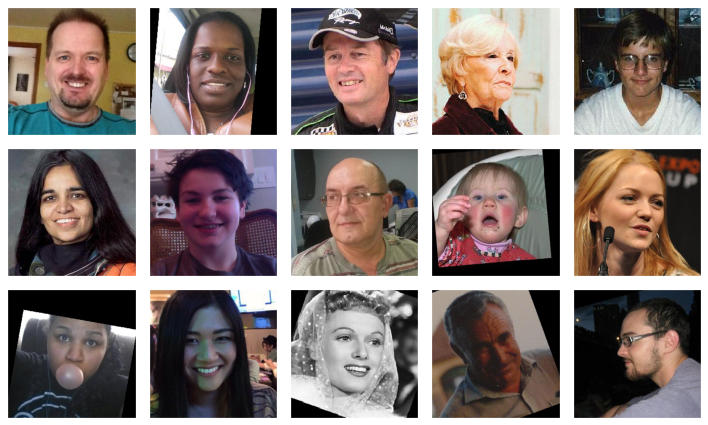

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
datagen_flow = datagen.flow_from_directory(path, target_size=(250,250), batch_size=15, seed=12345)
features, target = next(datagen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(5,5,i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Отлично, что выведены изображения.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

⚠️ Имеет смысл указать в `title` возраст, так сразу можно оценить корректность разметки.  
</div> 

### Вывод

Выборка содержит 7591 изображение, из них 75% тренировочный сет и 25% валидационный. Предсказать возможно только возраст людей от года до 70 лет, так как людей старше данного возраста не получится определить из-за недостатка данных. Людей в возрасте от 20 до 40 лет сеть сможет предсказывать лучше всего, так как людей этого возраста наибольшее количество в датасете.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Верные наблюдения. Действительно, малое количество данных для определенной категории (в данном случае для пожилых людей) может привести к смещению модели в сторону более представленных категорий (20-40 лет). Кроме того, модель может обучиться на основе характеристик данных категорий, которые не будут работать для других возрастов, что также может привести к низкому качеству предсказаний.
</div>

## Обучение модели

(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

def load_train(path):
    
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       vertical_flip=True,
                                       horizontal_flip=True, 
                                       rotation_range=30, 
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       validation_split=0.25)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'), 
        directory=path + 'final_files/', 
        x_col='file_name', 
        y_col='real_age',
        target_size=(250, 250),
        class_mode='raw', 
        batch_size=32,
        subset='training',
        seed=12345)

    return train_datagen_flow

def load_test(path):
    
    test_datagen = ImageDataGenerator(rescale=1./255, 
                                      validation_split=0.25
                                     )
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'), 
        directory=path + 'final_files/', 
        x_col='file_name', 
        y_col='real_age', 
        class_mode='raw',
        target_size=(250, 250),
        batch_size=32,
        subset='validation',
        seed=12345)

    return test_datagen_flow

def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet', 
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation ='relu'))
    model.compile(optimizer=optimizer, 
                  loss='mean_squared_error', 
                  metrics=['mae'])

    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
                 steps_per_epoch = len(train_data)
    if validation_steps is None:
                  validation_steps = len(test_data)

    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          use_multiprocessing = 1,
          verbose=2, shuffle=True)

    return model

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Архитектура сети и функция обучения определены верно.
</div>

```

Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 120s - loss: 267.0830 - mae: 12.0908 - val_loss: 774.9144 - val_mae: 22.9253
Epoch 2/10
178/178 - 111s - loss: 127.8414 - mae: 8.5376 - val_loss: 616.1448 - val_mae: 19.8349
Epoch 3/10
178/178 - 111s - loss: 110.0528 - mae: 7.9199 - val_loss: 304.6826 - val_mae: 12.9117
Epoch 4/10
178/178 - 114s - loss: 98.5490 - mae: 7.5468 - val_loss: 163.3609 - val_mae: 9.6198
Epoch 5/10
178/178 - 114s - loss: 88.2027 - mae: 7.1755 - val_loss: 102.2567 - val_mae: 7.8811
Epoch 6/10
178/178 - 116s - loss: 82.4241 - mae: 6.9121 - val_loss: 130.8515 - val_mae: 8.6026
Epoch 7/10
178/178 - 119s - loss: 74.7593 - mae: 6.6530 - val_loss: 121.9040 - val_mae: 8.4045
Epoch 8/10
178/178 - 117s - loss: 70.0219 - mae: 6.3629 - val_loss: 89.0413 - val_mae: 6.9970
Epoch 9/10
178/178 - 117s - loss: 65.3863 - mae: 6.1792 - val_loss: 82.1394 - val_mae: 6.6583
Epoch 10/10
178/178 - 115s - loss: 63.7210 - mae: 6.1083 - val_loss: 79.0516 - val_mae: 6.6003

60/60 - 11s - loss: 79.0516 - mae: 6.6003
Test MAE: 6.6003

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Цель достигнута. В статье о датасете, с которым мы работаем, значение MAE равно 5.4, поэтому тобой получены достаточно хорошие результаты.
</div>

## Анализ обученной модели

Была обученна модель с архитектурой ResNet50. Модель предсказывает возраст людей по фотографии достаточно точно с метрикой $MAE = 6.6003$ на тестовой выборке (средняя ошибка определения возраста не более 6.6 лет).

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Спасибо за работу, у тебя получился хороший проект. Если есть вопросы, то можешь задать их, если нет, то присылай назад и я его приму.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Проект принят. Удачи в дальнейшей учебе!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы